# Weight Initialization

Part 1: Understanding Weight Initialization

1. Explain the importance of weight initialization in artificial neural networks. Why is it necessary to initialize the weights carefully?

- Weight initialization is crucial in artificial neural networks because it determines the starting point of the optimization process during training.
- Careful initialization helps prevent issues like vanishing or exploding gradients, which can hinder training stability and convergence.
- Properly initialized weights enable the model to learn effectively and converge to an optimal solution.


2. Describe the challenges associated with improper weight initialization. How do these issues affect model training and convergence?

- Improper weight initialization can lead to issues such as vanishing or exploding gradients, where gradients become too small or too large during backpropagation.
- Vanishing gradients result in slow or stalled learning, while exploding gradients cause unstable training and divergence.
- These issues prolong training time, hinder convergence, and may prevent the model from reaching an optimal solution.



3. Discuss the concept of variance and how it relates to weight initialization. Why is it crucial to consider the variance of weights during initialization?

- Variance refers to the spread or dispersion of values in a distribution.
- During weight initialization, variance determines the range of values that weights can take, influencing the model's ability to learn complex patterns.
- It is crucial to consider the variance of weights to ensure that gradients neither vanish nor explode during training, promoting stable and efficient learning.



Part 2: Weight Initialization Techniques

1. Explain the concept of zero initialization. Discuss its potential limitations and when it can be appropriate to use.

- Zero initialization sets all weights to zero at the beginning of training.
- Its limitations include symmetry breaking issues, where all neurons in a layer start with the same value, hindering learning.
- Zero initialization may be appropriate for specific layers in networks where symmetry is desirable or when the activation functions are chosen to handle zero-initialized weights effectively.



2. Describe the process of random initialization. How can random initialization be adjusted to mitigate potential issues like saturation or vanishing/exploding gradients?

- Random initialization assigns random values to weights from a specified distribution, such as a uniform or normal distribution.
- To mitigate issues like saturation or vanishing/exploding gradients, the scale of random initialization can be adjusted based on the number of input and output units, ensuring proper variance.
- Techniques like He and Xavier initialization provide guidelines for setting the scale of random initialization to promote stable learning.



3. Discuss the concept of Xavier/Glorot initialization. Explain how it addresses the challenges of improper weight initialization and the underlying theory behind it.

- Xavier/Glorot initialization sets the initial weights from a zero-centered Gaussian distribution with a specific variance scaled based on the number of input and output units.
- It addresses improper weight initialization by ensuring that the variance of gradients remains consistent across layers, preventing vanishing or exploding gradients.
- The theory behind Xavier initialization is to maintain signal propagation through the network by keeping the variance of activations and gradients relatively constant during forward and backward passes.



4. Explain the concept of He initialization. How does it differ from Xavier initialization, and when is it preferred?

- He initialization sets the initial weights from a zero-centered Gaussian distribution with a variance scaled based only on the number of input units.
- Unlike Xavier initialization, He initialization does not account for the number of output units, making it more suitable for deeper networks where the number of output units may vary.
- He initialization is preferred for networks with deep architectures, such as convolutional neural networks (CNNs) and deep residual networks (ResNets).


Part 3: Applying Weight Ipitialization

Implement different weight initialization techniques (zero initialization, random initialization, Xavier
initialization, and He initialization) in a neural network using a framework of Your choice. Train the model
on a suitable dataset and compare the performance of the initialized modelsk

In [12]:
## import libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os

## loading the data
mnist=tf.keras.datasets.mnist

(X_train_full, y_train_full), (X_test, y_test)=mnist.load_data()

# validation and train split
X_valid,X_train=X_train_full[:5000]/255.,X_train_full[5000:]/255
X_test=X_test/255

y_valid, y_train=y_train_full[:5000],y_train_full[5000:]


## importing regularizers and dropout
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout


## Creating ANN layers with He Normal
LAYERS=[
    tf.keras.layers.Flatten(input_shape=[28,28],name="inputlayer"),
    tf.keras.layers.Dense(300,activation="relu", name="hiddenlayer1",
                          kernel_initializer=tf.keras.initializers.HeNormal(seed=None)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation="relu", name="hiddenlayer2",
                          kernel_initializer=tf.keras.initializers.HeNormal(seed=None)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax",name="outputlayer")
]

model=tf.keras.models.Sequential(LAYERS)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics='accuracy')

history=model.fit(X_train,y_train, epochs=10,validation_data=(X_valid,y_valid))

df=pd.DataFrame(data=history.history)

Epoch 1/10
1719/1719 [==============================] - 12s 6ms/step - loss: 1.0737 - accuracy: 0.6595 - val_loss: 0.4811 - val_accuracy: 0.8696
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5587 - accuracy: 0.8340 - val_loss: 0.3577 - val_accuracy: 0.9022
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4579 - accuracy: 0.8641 - val_loss: 0.3030 - val_accuracy: 0.9166
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4048 - accuracy: 0.8802 - val_loss: 0.2691 - val_accuracy: 0.9252
Epoch 5/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3699 - accuracy: 0.8913 - val_loss: 0.2459 - val_accuracy: 0.9316
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3366 - accuracy: 0.9016 - val_loss: 0.2287 - val_accuracy: 0.9350
Epoch 7/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3163 - accuracy: 0.9069 - val_loss: 0.2141 - val_ac

In [13]:
## Creating ANN layers with Xavier Glorot
LAYERS=[
    tf.keras.layers.Flatten(input_shape=[28,28],name="inputlayer"),
    tf.keras.layers.Dense(300,activation="relu", name="hiddenlayer1",
                          kernel_initializer=tf.keras.initializers.GlorotNormal(seed=None)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation="relu", name="hiddenlayer2",
                          kernel_initializer=tf.keras.initializers.GlorotNormal(seed=None)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax",name="outputlayer")
]

model=tf.keras.models.Sequential(LAYERS)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics='accuracy')

history=model.fit(X_train,y_train, epochs=10,validation_data=(X_valid,y_valid))

df1=pd.DataFrame(data=history.history)

Epoch 1/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.9447 - accuracy: 0.7038 - val_loss: 0.4334 - val_accuracy: 0.8824
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5033 - accuracy: 0.8531 - val_loss: 0.3202 - val_accuracy: 0.9136
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4086 - accuracy: 0.8831 - val_loss: 0.2716 - val_accuracy: 0.9252
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3601 - accuracy: 0.8959 - val_loss: 0.2424 - val_accuracy: 0.9328
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3269 - accuracy: 0.9059 - val_loss: 0.2202 - val_accuracy: 0.9392
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3003 - accuracy: 0.9133 - val_loss: 0.2033 - val_accuracy: 0.9432
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2790 - accuracy: 0.9179 - val_loss: 0.1900 - val_accu

In [14]:
## Creating ANN layers with 0 initial weight
LAYERS=[
    tf.keras.layers.Flatten(input_shape=[28,28],name="inputlayer"),
    tf.keras.layers.Dense(300,activation="relu", name="hiddenlayer1",
                          kernel_initializer=tf.keras.initializers.Constant(value=0)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation="relu", name="hiddenlayer2",
                          kernel_initializer=tf.keras.initializers.Constant(value=0)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax",name="outputlayer")
]

model=tf.keras.models.Sequential(LAYERS)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics='accuracy')

history=model.fit(X_train,y_train, epochs=10,validation_data=(X_valid,y_valid))

df2=pd.DataFrame(data=history.history)

Epoch 1/10
1719/1719 [==============================] - 11s 6ms/step - loss: 2.3021 - accuracy: 0.1121 - val_loss: 2.3016 - val_accuracy: 0.1126
Epoch 2/10
1719/1719 [==============================] - 11s 7ms/step - loss: 2.3016 - accuracy: 0.1123 - val_loss: 2.3012 - val_accuracy: 0.1126
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: 2.3014 - accuracy: 0.1123 - val_loss: 2.3010 - val_accuracy: 0.1126
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 2.3013 - accuracy: 0.1123 - val_loss: 2.3010 - val_accuracy: 0.1126
Epoch 5/10
1719/1719 [==============================] - 12s 7ms/step - loss: 2.3012 - accuracy: 0.1123 - val_loss: 2.3009 - val_accuracy: 0.1126
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 2.3012 - accuracy: 0.1123 - val_loss: 2.3009 - val_accuracy: 0.1126
Epoch 7/10
1719/1719 [==============================] - 10s 6ms/step - loss: 2.3012 - accuracy: 0.1123 - val_loss: 2.3009 - val_ac

In [15]:
## Creating ANN layers with 0 initial weight
LAYERS=[
    tf.keras.layers.Flatten(input_shape=[28,28],name="inputlayer"),
    tf.keras.layers.Dense(300,activation="relu", name="hiddenlayer1",
                          kernel_initializer=tf.keras.initializers.Constant(value=1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation="relu", name="hiddenlayer2",
                          kernel_initializer=tf.keras.initializers.Constant(value=1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax",name="outputlayer")
]

model=tf.keras.models.Sequential(LAYERS)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics='accuracy')

history=model.fit(X_train,y_train, epochs=10,validation_data=(X_valid,y_valid))

df3=pd.DataFrame(data=history.history)

Epoch 1/10
1719/1719 [==============================] - 11s 6ms/step - loss: 2.3719 - accuracy: 0.1672 - val_loss: 2.1769 - val_accuracy: 0.1872
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 2.3361 - accuracy: 0.1701 - val_loss: 2.1739 - val_accuracy: 0.1906
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: 2.3173 - accuracy: 0.1721 - val_loss: 2.1707 - val_accuracy: 0.1916
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 2.3044 - accuracy: 0.1720 - val_loss: 2.1722 - val_accuracy: 0.1920
Epoch 5/10
1719/1719 [==============================] - 11s 6ms/step - loss: 2.2927 - accuracy: 0.1741 - val_loss: 2.1702 - val_accuracy: 0.1924
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 2.2844 - accuracy: 0.1733 - val_loss: 2.1682 - val_accuracy: 0.1968
Epoch 7/10
1719/1719 [==============================] - 10s 6ms/step - loss: 2.2736 - accuracy: 0.1733 - val_loss: 2.1655 - val_ac

<Figure size 1500x1500 with 0 Axes>

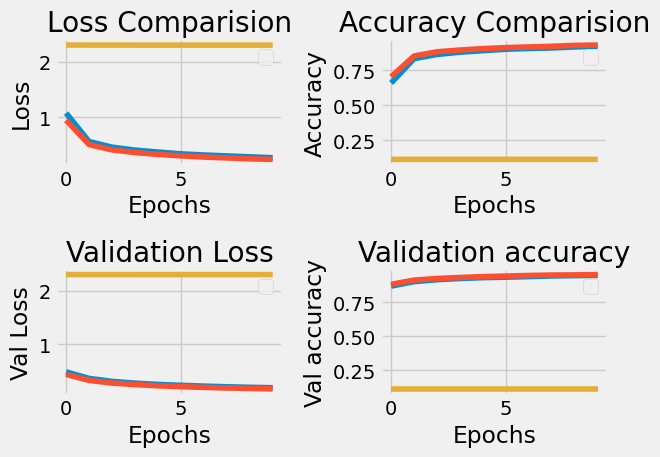

In [18]:
## It's time to compare the results
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,15))
plt.subplots(2,2)

plt.subplot(2,2,1)
plt.plot(pd.concat([df['loss'],df1['loss'],df2['loss']],axis=1))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Comparision")
plt.legend()

plt.subplot(2,2,2)
plt.plot(pd.concat([df['accuracy'],df1['accuracy'],df2['accuracy']],axis=1))
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparision")
plt.legend()

plt.subplot(2,2,3)
plt.plot(pd.concat([df['val_loss'],df1['val_loss'],df2['val_loss']],axis=1))
plt.xlabel("Epochs")
plt.ylabel("Val Loss")
plt.title("Validation Loss")
plt.legend()

plt.subplot(2,2,4)
plt.plot(pd.concat([df['val_accuracy'],df1['val_accuracy'],df2['val_accuracy']],axis=1))
plt.xlabel("Epochs")
plt.ylabel("Val accuracy")
plt.title("Validation accuracy")
plt.legend()
plt.tight_layout()

plt.show()

In [19]:
df.describe()

,loss,accuracy,val_loss,val_accuracy
count,10.000000,10.000000,10.000000,10.00000
mean,0.436758,0.868896,0.267733,0.92578
std,0.240915,0.078398,0.092414,0.02438
min,0.266774,0.659455,0.183687,0.86960
25%,0.303814,0.868086,0.205080,0.91875
50%,0.353226,0.896427,0.237326,0.93330
75%,0.444614,0.909759,0.294550,0.94275
max,1.073740,0.923200,0.481095,0.94800


In [20]:
df1.describe()

,loss,accuracy,val_loss,val_accuracy
count,10.000000,10.000000,10.000000,10.000000
mean,0.386957,0.885636,0.239267,0.934080
std,0.212409,0.068173,0.084152,0.022267
min,0.237076,0.703764,0.162413,0.882400
25%,0.266970,0.886332,0.181613,0.927100
50%,0.313616,0.909609,0.211731,0.941200
75%,0.396504,0.921505,0.264331,0.950000
max,0.944655,0.931509,0.433445,0.954400


In [21]:
df2.describe()

,loss,accuracy,val_loss,val_accuracy
count,10.000000,10.000000,10.000000,10.0000
mean,2.301375,0.112320,2.301023,0.1126
std,0.000282,0.000080,0.000237,0.0000
min,2.301230,0.112091,2.300884,0.1126
25%,2.301234,0.112345,2.300900,0.1126
50%,2.301244,0.112345,2.300913,0.1126
75%,2.301339,0.112345,2.301014,0.1126
max,2.302121,0.112345,2.301633,0.1126


Discuss the considerations and tradeoffs when choosing the appropriate weight initialization technique
for a given neural network architecture and task.

When choosing the appropriate weight initialization technique for a neural network architecture and task, several considerations and trade-offs need to be taken into account:

1. **Network Architecture:**
   - The architecture of the neural network, including the type of layers (e.g., fully connected, convolutional, recurrent) and their connectivity patterns, can influence the choice of weight initialization technique. Some techniques may be more suitable for specific layer types or architectures.

2. **Activation Functions:**
   - The choice of activation functions (e.g., sigmoid, tanh, ReLU) can impact the effectiveness of weight initialization techniques. Certain techniques may perform better with specific activation functions, and vice versa.

3. **Training Stability:**
   - Weight initialization techniques should promote stable training by preventing issues such as vanishing or exploding gradients. Considerations should be made to ensure that the chosen technique facilitates smooth and efficient optimization.

4. **Convergence Speed:**
   - The speed at which the neural network converges to an optimal solution is an important factor. Some weight initialization techniques may accelerate convergence by providing better initial conditions for learning.

5. **Initialization Scale:**
   - The scale of initialization can impact the range of values that weights can take, influencing the dynamics of learning. Techniques that provide appropriate scaling based on the network's architecture and activation functions can lead to better performance.
   models.

6. **Domain-Specific Considerations:**
   - Domain-specific knowledge about the data and task can guide the selection of weight initialization techniques. For example, certain techniques may be more suitable for specific types of data or problem domains.


## The End